# Quantization or Binning


In [1]:
import numpy as np  
import pandas as pd
#generate a random dataframe with  
# #2 columns and 100 rows  
df = pd.DataFrame(  np.random.rand(100, 2),  columns=[f"f_{i}" for i in range(1, 3)]  ) 

#create bins of the numerical columns  
# #10 bins  
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)  
#100 bins  

df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)  

df

,f_1,f_2,f_bin_10,f_bin_100
0,0.741963,0.239889,7,74
1,0.058597,0.589484,0,4
2,0.048952,0.786766,0,3
3,0.040911,0.647178,0,3
4,0.482466,0.681489,4,47
...,...,...,...,...
95,0.913995,0.113581,9,91
96,0.977888,0.821313,9,97
97,0.009860,0.434213,0,0
98,0.100688,0.216376,0,9


In [10]:
# Example 2-2. Visualizing business review counts in the Yelp dataset
import pandas as pd
import json
# Load the data about businesses
biz_file = open('yelp_academic_dataset_business.json', encoding="utf8")
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()


Text(0, 0.5, 'Occurrence')

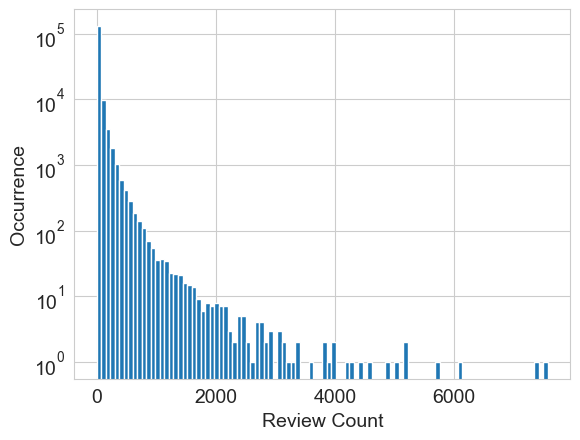

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram of the review counts
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)


In [17]:
# Example 2-3. Quantizing counts with fixed-width bins >>> 
import numpy as np

# Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
print('Uniformly spaced bins:\n', small_counts)

# Map to evenly spaced bins 0-9 by division
even = np.floor_divide(small_counts, 10)
print('Evenly spaced bins:\n', even)

# An array of counts that span several magnitudes
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
# Map to exponential-width bins via the log function
np.floor(np.log10(large_counts))
print('Large Magnitudes:\n', even)



Uniformly spaced bins:
 [31 89 16 61 31 94 12 66 42 73 14 43 93 56 30 60  4 23  3 44]
Evenly spaced bins:
 [3 8 1 6 3 9 1 6 4 7 1 4 9 5 3 6 0 2 0 4]
Large Magnitudes:
 [3 8 1 6 3 9 1 6 4 7 1 4 9 5 3 6 0 2 0 4]


Quantile binning


0.1     6.0
0.2     7.0
0.3     9.0
0.4    11.0
0.5    15.0
0.6    20.0
0.7    30.0
0.8    48.0
0.9    97.0
Name: review_count, dtype: float64


Text(0, 0.5, 'Occurrence')

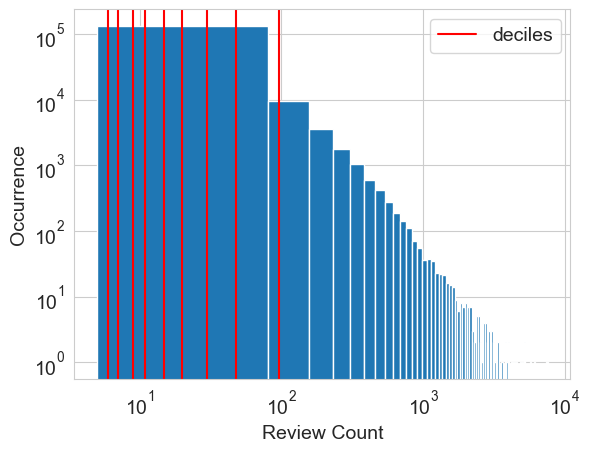

In [19]:
# Computing deciles of Yelp business review counts >>> 
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
print(deciles)

# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [21]:
# Binning counts by quantiles 
# # Continue example 2-3 with large_counts
import pandas as pd

# Map the counts to quartiles
quantiles = pd.qcut(large_counts, 4, labels=False)

# Compute the quantiles themselves
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])


0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

0.25     8.0
0.50    15.0
0.75    37.0
Name: review_count, dtype: float64


Text(0, 0.5, 'Occurrence')

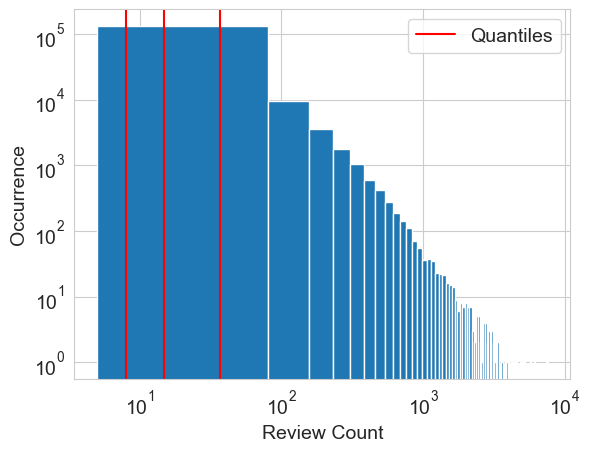

In [24]:
# Computing deciles of Yelp business review counts >>> 
quantiles = biz_df['review_count'].quantile([.25,.5,.75])
print(quantiles)

# Visualize the deciles on the histogram
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in quantiles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['Quantiles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [27]:
biz_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


Text(0.5, 0, 'log10(review_count))')

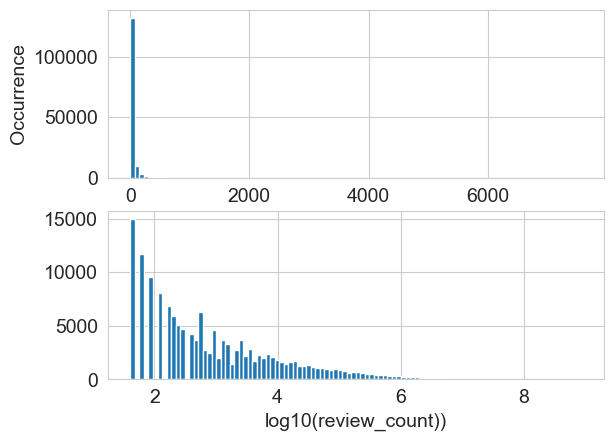

In [34]:
# Visualizing the distribution of review counts before and after log transform
from math import log
biz_df['log_review_count'] = biz_df['review_count'].apply(lambda x: log(float(x)))

fig, (ax1, ax2) = plt.subplots(2,1)

biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
